---

## **ANÁLISIS DE LOS RESULTADOS RELATIVOS AL CONSUMO ENERGÉTICO**

---

**Autor:** Sergio Bolívar Gómez

**Fecha de creación:** 15 de junio de 2023.

**Última modificación:** 7 de julio de 2023.


Importamos algunas librerías de utilidad...

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Para usar la fuente de LaTex en los plots
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']

## **CARGADO DE DATOS**

In [46]:
# Cargamos los datos desde el CSV
data = pd.read_csv('/home/bolivars/Escritorio/code/4-energy-optimization/optimized-heating-patterns/plots/energy-plots/energy-cons-compilation.csv', sep=";")

data = data.drop(18) # quitamos los resultados relativos al patrón medio (no debe influir en las estadísticas)

**NOTA:** AVG. HEAT. TREAT. hace referencia al patrón de calentamiento que resulta de hacer la media de los patrones de calentamiento de todas las palanquillas 6211341-6211358.

In [47]:
data # visualizamos los datos en formato tabular

,PALANQUILLA,RMSE-INICIAL,CONSUMO-INICIAL,RMSE-OPTIMIZADO,CONSUMO-OPTIMIZADO,VARIACIÓN-RMSE,VARIACIÓN-ENERGÉTICO
0,6211341,"4,2","17,188","3,48","13,048","-17,1","-24,1"
1,6211342,"2,89","16,552","2,42","12,15","-16,3","-26,6"
2,6211343,"4,64","14,648","4,73","11,172","1,9","-23,7"
3,6211344,"5,93","11,769","4,76","10,892","-19,7","-7,5"
4,6211345,"5,08","14,454","3,67","10,99","-27,8","-24,0"
5,6211346,"5,23","13,976","3,73","10,508","-28,7","-24,8"
6,6211347,"4,54","15,547","3,08","11,897","-32,2","-23,5"
7,6211348,"7,13","16,176","4,01","10,98","-43,8","-32,1"
8,6211349,"3,25","15,939","3,4","11,876","4,6","-25,5"
9,6211350,"3,82","15,886","4,54","12,988","18,8","-18,2"


Se definen algunas variables con información contenida en el DataFrame anterior...

In [48]:
# NÚMERO DE PALANQUILAS
num_palanquillas = len(data["PALANQUILLA"])

# CONSUMO ENERGÉTICO
consumo_inicial = np.array([float(value.replace(',', '.')) for value in data["CONSUMO-INICIAL"].values])
consumo_optimizado = np.array([float(value.replace(',', '.')) for value in data["CONSUMO-OPTIMIZADO"].values])
variacion_energia = np.array([float(value.replace(',', '.')) for value in data["VARIACIÓN-ENERGÉTICO"].values])

# RMSE
rmse_inicial = np.array([float(value.replace(',', '.')) for value in data["RMSE-INICIAL"].values])
rmse_optimizado = np.array([float(value.replace(',', '.')) for value in data["RMSE-OPTIMIZADO"].values])
variacion_rmse = np.array([float(value.replace(',', '.')) for value in data["VARIACIÓN-RMSE"].values])

## **REPRESENTACIÓN GRÁFICA: CONSUMO ENERGÉTICO**

Se representa el consumo energético asociado a los patrones de calentamiento actuales (los de GSW), así como el consumo energético de los patrones optimizados encontrados con Deep Q-Learning...

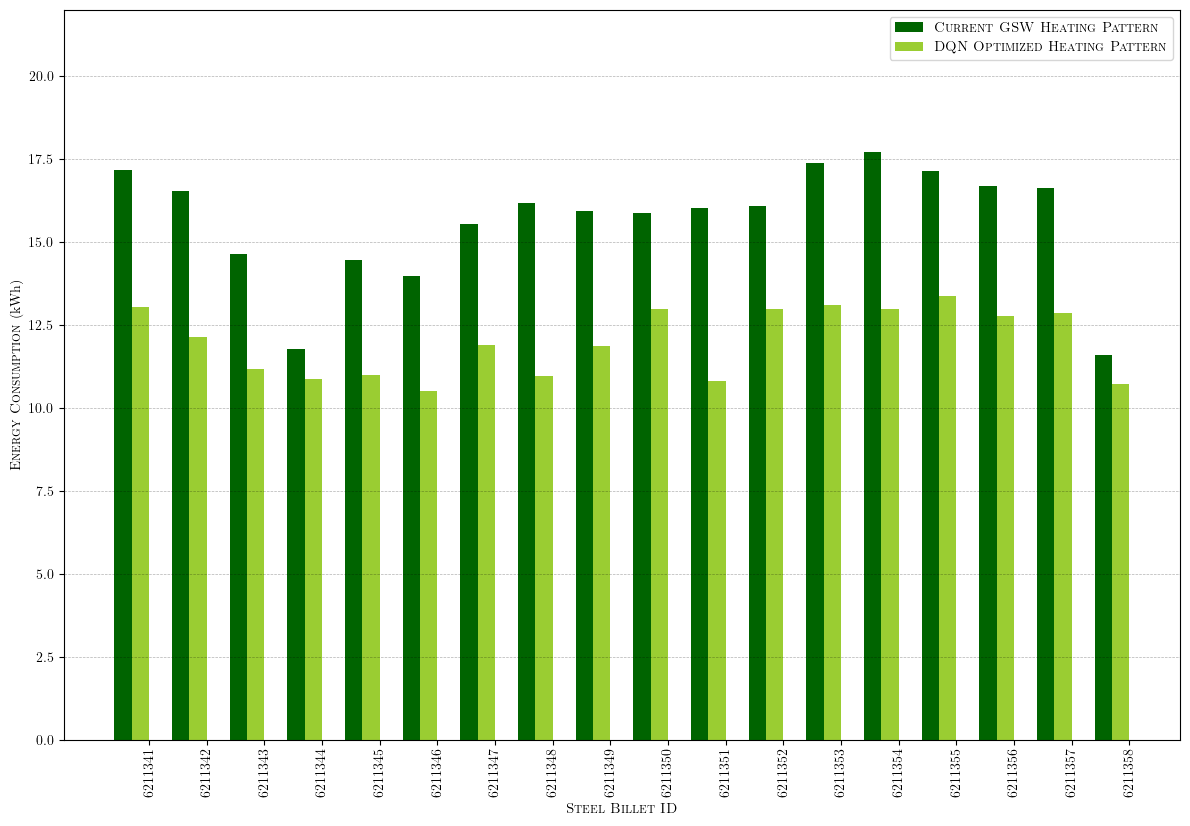

In [49]:
fig, ax = plt.subplots(figsize=(12,8))

width = 0.3 # anchura de las barras del diagrama de barras (no muy grande porque solapa)

x_labels = data["PALANQUILLA"].tolist() # son los ticks del eje X
x = np.arange(num_palanquillas) # para la representación "categórica": palanquilla a palanquilla

# Barplots
ax.bar(x, consumo_inicial, width, color="darkgreen", label=r'\textsc{Current GSW Heating Pattern')
ax.bar(x + width, consumo_optimizado, width, color='yellowgreen', label=r'\textsc{DQN Optimized Heating Pattern')

ax.set_xlabel(r'\textsc{Steel Billet ID}')
ax.set_ylabel(r'\textsc{Energy Consumption} (kWh)')
# ax.set_title('Optimization of Energy Consumption')

ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_ylim(0,22)

ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.subplots_adjust(bottom=0.2)
fig.tight_layout()
plt.xticks(rotation=90)

plt.savefig("energy-consumption-barplots.png", dpi=1000, bbox_inches='tight')

plt.show()

Se representa un diagrama de barras con la reducción del consumo energético (en tanto por ciento) para cada palanquilla...

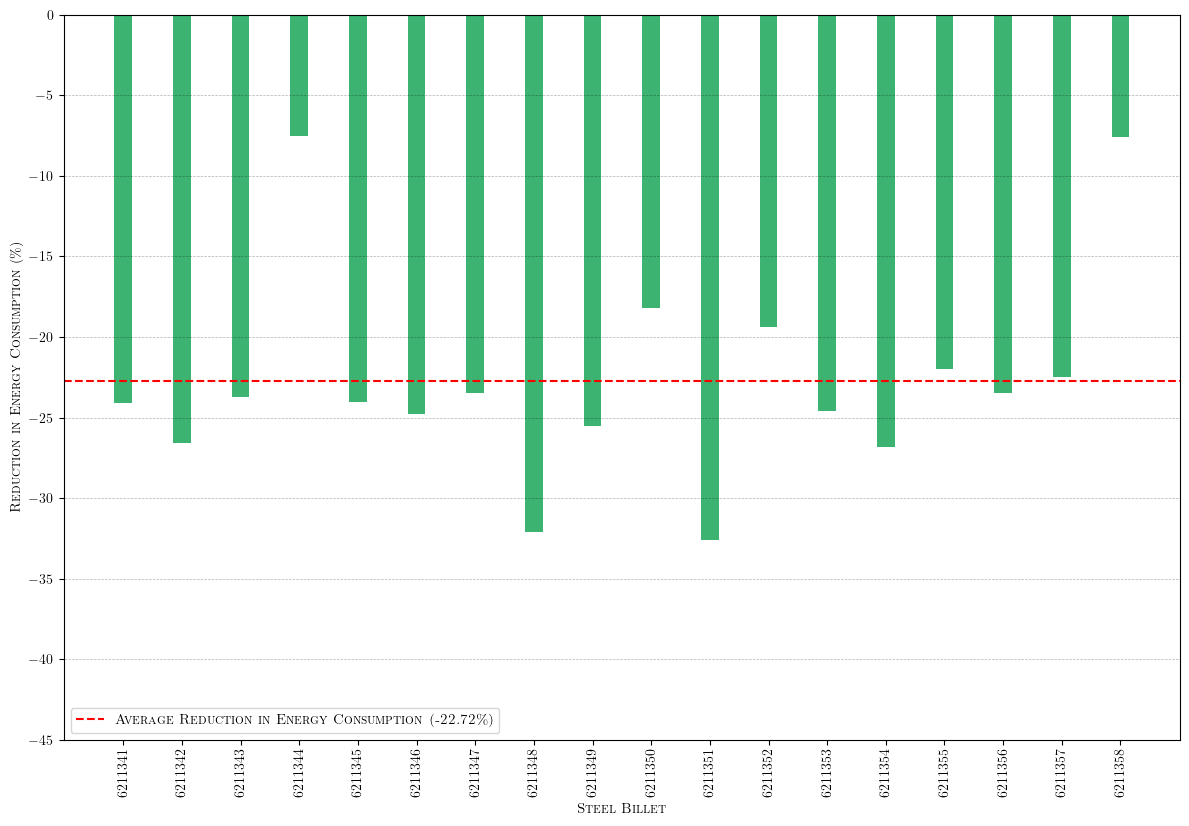

In [50]:
fig, ax = plt.subplots(figsize=(12,8))

width = 0.3 # anchura de las barras del diagrama de barras (no muy grande porque solapa)

x_labels = data["PALANQUILLA"].tolist() # son los ticks del eje X
x = np.arange(num_palanquillas) # para la representación "categórica": palanquilla a palanquilla

# Barplots
ax.bar(x, variacion_energia, width, color="mediumseagreen")

ax.set_xlabel(r'\textsc{Steel Billet}')
ax.set_ylabel(r'\textsc{Reduction in Energy Consumption} (\%)')
# ax.set_title('Optimization of Energy Consumption')

mean_value = np.mean(variacion_energia)
ax.axhline(mean_value, color='red', linestyle='--', label=fr'\textsc{{Average Reduction in Energy Consumption ({mean_value:.2f}\%)}}')


ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(-45, 0)

ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.subplots_adjust(bottom=0.2)
fig.tight_layout()
plt.xticks(rotation=90)

plt.savefig("energy-consumption-reduction.png", dpi=1000, bbox_inches='tight')

plt.show()

Se representa un histograma con la distribución de la reducción en el consumo energético...

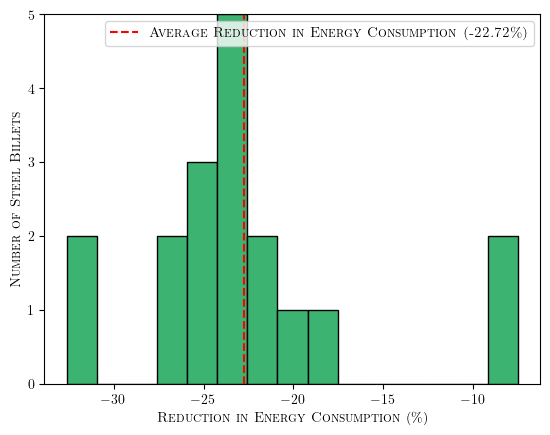

In [51]:
fig, ax = plt.subplots()

# Histograma
ax.hist(variacion_energia, bins=15, color="mediumseagreen", edgecolor="black")

ax.set_xlabel(r'\textsc{Reduction in Energy Consumption} (\%)')
ax.set_ylabel(r'\textsc{Number of Steel Billets}')
ax.set_ylim(0,5)
mean_value = np.mean(variacion_energia)
ax.axvline(mean_value, color='red', linestyle='--', label=fr'\textsc{{Average Reduction in Energy Consumption ({mean_value:.2f}\%)}}')
ax.legend()
plt.show()

## **REPRESENTACIÓN GRÁFICA: RMSE**

Se representa el RMSE entre los patrones de calientamiento actuales y el perfil de temperatura objetivo, así como el RMSE entre los patrones de calentamiento optimizados y el perfil de temperatura objetivo...

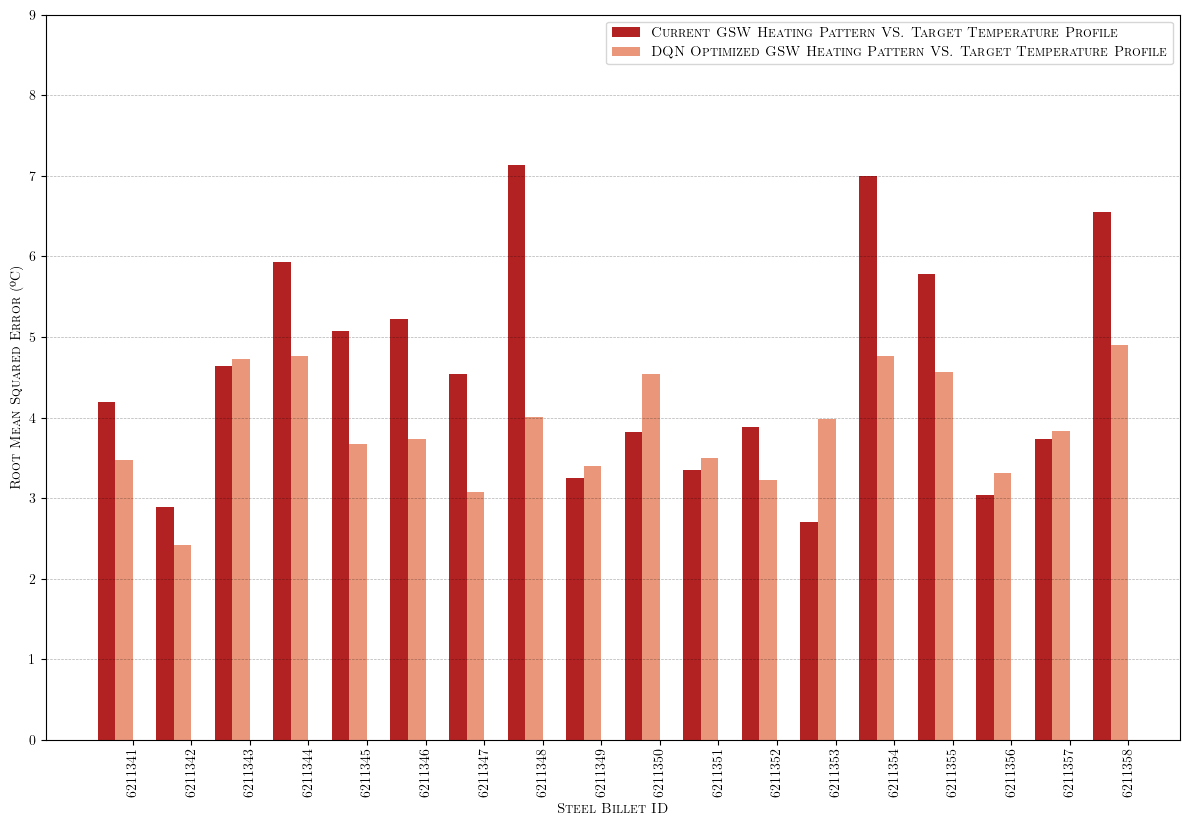

In [52]:
fig, ax = plt.subplots(figsize=(12,8))

width = 0.3 # anchura de las barras del diagrama de barras (no muy grande porque solapa)

x_labels = data["PALANQUILLA"].tolist() # son los ticks del eje X
x = np.arange(num_palanquillas) # para la representación "categórica": palanquilla a palanquilla

# Barplots
ax.bar(x, rmse_inicial, width, color="firebrick", label=r"\textsc{Current GSW Heating Pattern VS. Target Temperature Profile}")
ax.bar(x + width, rmse_optimizado, width, color='darksalmon', label=r"\textsc{DQN Optimized GSW Heating Pattern VS. Target Temperature Profile}")

ax.set_xlabel(r'\textsc{Steel Billet ID}')
ax.set_ylabel(r'\textsc{Root Mean Squared Error} (ºC)')
# ax.set_title('Optimization of Energy Consumption')

ax.set_xticks(x + width + width/2)
ax.set_xticklabels(x_labels)
ax.set_ylim(0,9)

ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)

fig.subplots_adjust(bottom=0.2)
fig.tight_layout()
plt.xticks(rotation=90)

plt.savefig("rmse-barplots.png", dpi=1000, bbox_inches='tight')

plt.show()

Se representa un diagrama de barras con la reducción del RMSE (en tanto por ciento) para cada palanquilla...

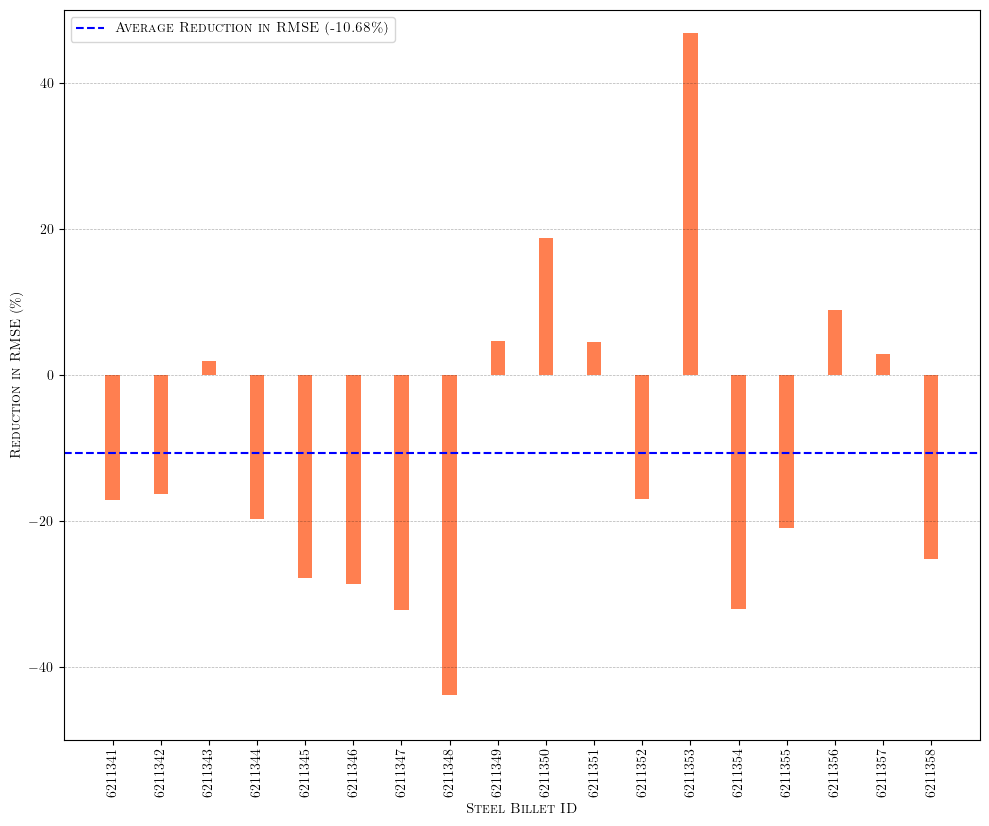

In [53]:
fig, ax = plt.subplots(figsize=(10,8))

width = 0.3 # anchura de las barras del diagrama de barras (no muy grande porque solapa)

x_labels = data["PALANQUILLA"].tolist() # son los ticks del eje X
x = np.arange(num_palanquillas) # para la representación "categórica": palanquilla a palanquilla

# Barplots
ax.bar(x, variacion_rmse, width, color="coral")

ax.set_xlabel(r'\textsc{Steel Billet ID}')
ax.set_ylabel(r'\textsc{Reduction in RMSE} (\%)')
# ax.set_title('Optimization of Energy Consumption')

mean_value = np.mean(variacion_rmse)
ax.axhline(mean_value, color='blue', linestyle='--', label=fr'\textsc{{Average Reduction in RMSE ({mean_value:.2f}\%)}}')

ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_ylim(-50,50)

ax.legend()
plt.grid(True, 'major', 'y', ls='--', lw=.5, c='k', alpha=.3)
fig.tight_layout()
plt.xticks(rotation=90)

plt.show()

Se representa un histograma con la distribución de la reducción en el RMSE...

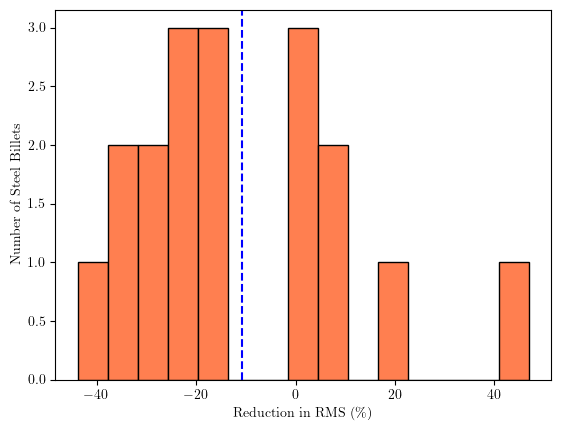

In [54]:
fig, ax = plt.subplots()

# Histograma
ax.hist(variacion_rmse, bins = 15, color = "coral", edgecolor="black")

ax.set_xlabel('Reduction in RMS (\%)')
ax.set_ylabel('Number of Steel Billets')
# ax.set_xticks(rotation=90)
mean_value = np.mean(variacion_rmse)
ax.axvline(mean_value, color='blue', linestyle='--', label=fr'\textsc{{Average Reduction in RMSE ({mean_value:.2f}\%)}}')

# Display the histogram
plt.show()